<a href="https://colab.research.google.com/github/Guillermo-rv/Deep-Learning/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

print("Versión de TensorFlow:", tf.__version__)
print("¿TensorFlow está usando GPU?", tf.config.list_physical_devices('GPU'))

Versión de TensorFlow: 2.18.0
¿TensorFlow está usando GPU? [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Tamaño del conjunto de entrenamiento: (60000, 28, 28)
Tamaño del conjunto de prueba: (10000, 28, 28)


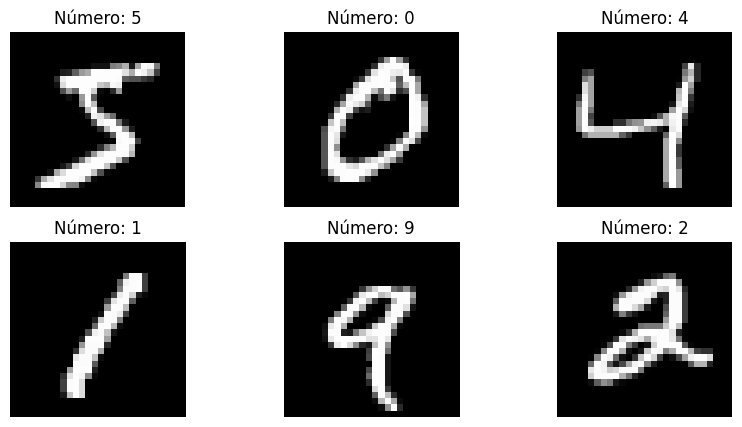

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Número: {y_train[i]}")
    plt.axis("off")
plt.show()


In [ ]:

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0


X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


print("Nueva forma de X_train:", X_train.shape)
print("Nueva forma de X_test:", X_test.shape)


Nueva forma de X_train: (60000, 28, 28, 1)
Nueva forma de X_test: (10000, 28, 28, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  # Capa Conv 1
    MaxPooling2D((2,2)),  # Pooling 1
    Conv2D(64, (3,3), activation='relu'),  # Capa Conv 2
    MaxPooling2D((2,2)),  # Pooling 2
    Flatten(),  # Aplanar para conectar con las capas densas
    Dense(128, activation='relu'),  # Capa totalmente conectada
    Dense(10, activation='softmax')  # Capa de salida con 10 clases (0-9)
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9006 - loss: 0.3111 - val_accuracy: 0.9862 - val_loss: 0.0420
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9861 - loss: 0.0426 - val_accuracy: 0.9884 - val_loss: 0.0368
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9905 - loss: 0.0288 - val_accuracy: 0.9882 - val_loss: 0.0346
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9936 - loss: 0.0210 - val_accuracy: 0.9908 - val_loss: 0.0290
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9952 - loss: 0.0143 - val_accuracy: 0.9911 - val_loss: 0.0277
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9970 - loss: 0.0100 - val_accuracy: 0.9923 - val_loss: 0.0270
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9974 - loss: 0.0080 - val_accuracy: 0.9910 - val_loss: 0.0319
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9979 - loss: 0.0057

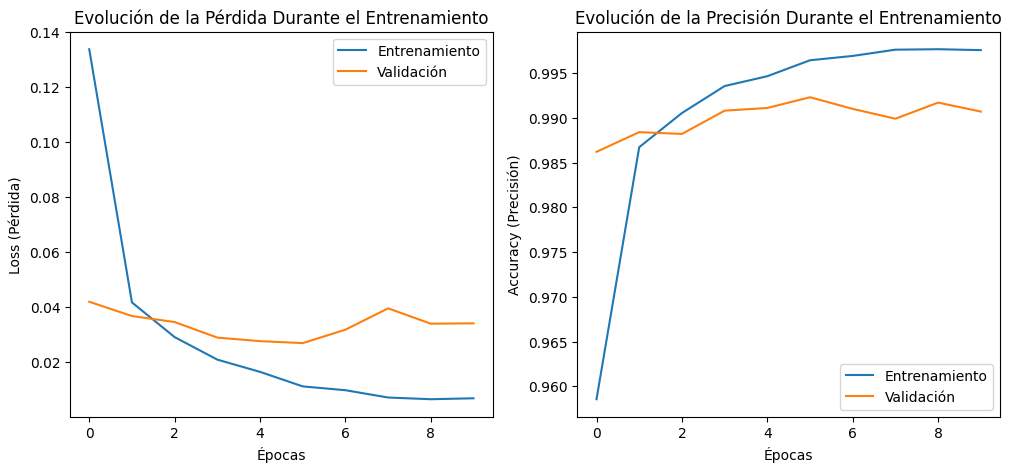

In [ ]:
import matplotlib.pyplot as plt

# Extraer los valores de entrenamiento y validación
history_dict = history.history

plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.plot(history_dict["loss"], label="Entrenamiento")
plt.plot(history_dict["val_loss"], label="Validación")
plt.xlabel("Épocas")
plt.ylabel("Loss (Pérdida)")
plt.title("Evolución de la Pérdida Durante el Entrenamiento")
plt.legend()


plt.subplot(1,2,2)
plt.plot(history_dict["accuracy"], label="Entrenamiento")
plt.plot(history_dict["val_accuracy"], label="Validación")
plt.xlabel("Épocas")
plt.ylabel("Accuracy (Precisión)")
plt.title("Evolución de la Precisión Durante el Entrenamiento")
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


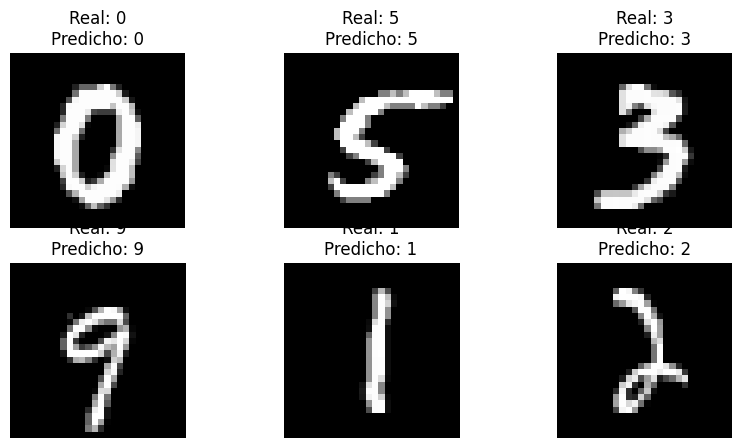

In [ ]:
import numpy as np


num_imagenes = 6
indices = np.random.choice(X_test.shape[0], num_imagenes, replace=False)
imagenes_muestra = X_test[indices]
etiquetas_reales = y_test[indices]


predicciones = model.predict(imagenes_muestra)
predicciones_clase = np.argmax(predicciones, axis=1)


plt.figure(figsize=(10,5))
for i in range(num_imagenes):
    plt.subplot(2, 3, i+1)
    plt.imshow(imagenes_muestra[i].reshape(28,28), cmap='gray')
    plt.title(f"Real: {etiquetas_reales[i]}\nPredicho: {predicciones_clase[i]}")
    plt.axis("off")
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0444
Precisión en el conjunto de prueba: 0.9907
